## Multiple Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing

%matplotlib inline

In [2]:
data = fetch_california_housing()

In [3]:
data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]], shape=(20640, 8)),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,)),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': 

In [14]:
data['target']

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,))

In [12]:
y = pd.Series(data=data['target'], name=data['target_names'][0])

In [13]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

In [15]:
y.shape

(20640,)

In [18]:
X = pd.DataFrame(data = data['data'], columns=data['feature_names'])

In [19]:
X.shape

(20640, 8)

In [20]:
X.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

In [21]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


<Axes: >

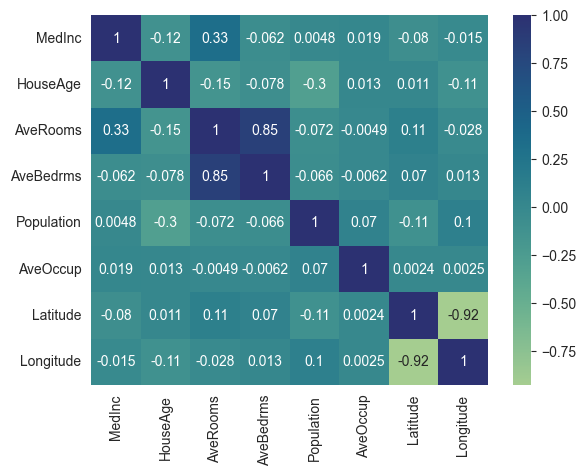

In [23]:
sns.heatmap(X.corr(), cmap='crest', annot=True)

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=10)

In [28]:
X_train.shape, X_test.shape,y_train.shape, y_test.shape

((13828, 8), (6812, 8), (13828,), (6812,))

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model Training

In [30]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [31]:
y_pred = model.predict(X_test_scaled)

In [34]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
score = r2_score(y_test, y_pred)
mse=mean_squared_error(y_test, y_pred)
mae=mean_absolute_error(y_test, y_pred)

In [35]:
print("Mean squared Error: ", mse)
print("Mean Absolute Error: ", mae)
print("Root Mean squared Error: ", np.sqrt(mse))
print("R2 score: ", score)

Mean squared Error:  0.552233239936362
Mean Absolute Error:  0.5371056943007961
Root Mean squared Error:  0.743123973463622
R2 score:  0.5935958526436639


## Adjusted R square

In [36]:
1- (1-score)*(len(y_test) - 1)/ (len(y_test) - X_test.shape[1] - 1)

0.5931179409607519

## Assumptions

Text(0, 0.5, 'Test Predicted Data')

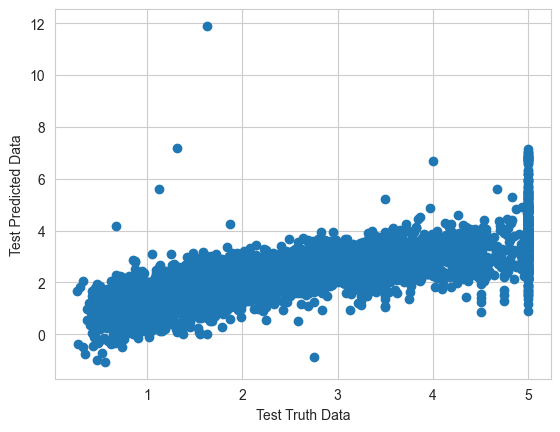

In [37]:
plt.scatter(y_test, y_pred)
plt.xlabel('Test Truth Data')
plt.ylabel('Test Predicted Data')

## Residuals

In [38]:
residuals = y_test-y_pred

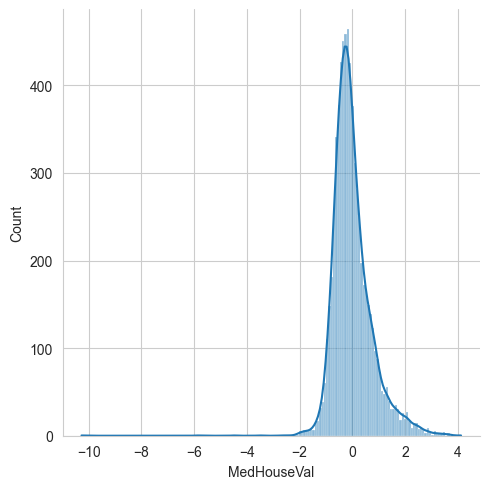

In [39]:
sns.displot(residuals, kde=True)

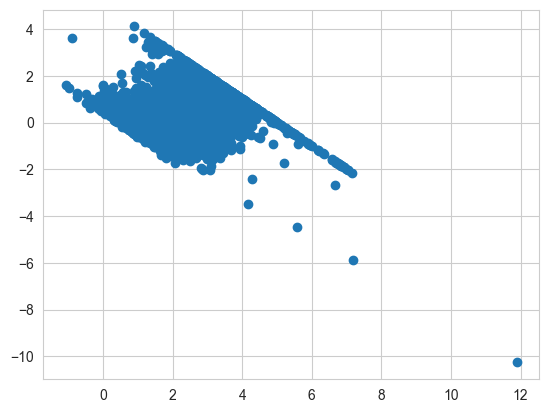

In [40]:
# Scatter plot with predictions and residuals
# uniform distribution
plt.scatter(y_pred, residuals)

In [41]:
model

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [42]:
## Create a pickle file to deploy model
import pickle
pickle.dump(model, open('multiLinearmodel.pkl','wb'))

In [44]:
regressor = pickle.load(open('multiLinearmodel.pkl','rb'))

In [45]:
regressor.predict(X_test_scaled)

array([3.00397485, 2.58011486, 2.3489077 , ..., 3.09003708, 0.79152007,
       2.04477012], shape=(6812,))